In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
import os.path
import numpy as np

from neural_noise import plot

import yass
from yass.preprocess.filter import butterworth
from yass.preprocess.standarize import sd, standarize

from yass.process.noise import blocks
from yass.neuralnet import NeuralNetDetector

In [4]:
from neural_noise import plot

In [5]:
yass.set_config('config.yaml')
cfg = yass.read_config()
dims = (49998, 31, 7)

In [6]:
def plot_data(data):
    plt.plot(data[:500, 2])

def plot_matrix(m):
    plt.imshow(m)
    plt.colorbar()
    plt.show()

## Data loading

In [7]:
data = np.fromfile(os.path.join(cfg.root, cfg.filename), dtype='int16')
data = data.reshape(6000000, 49)

In [8]:
data.shape

(6000000, 49)

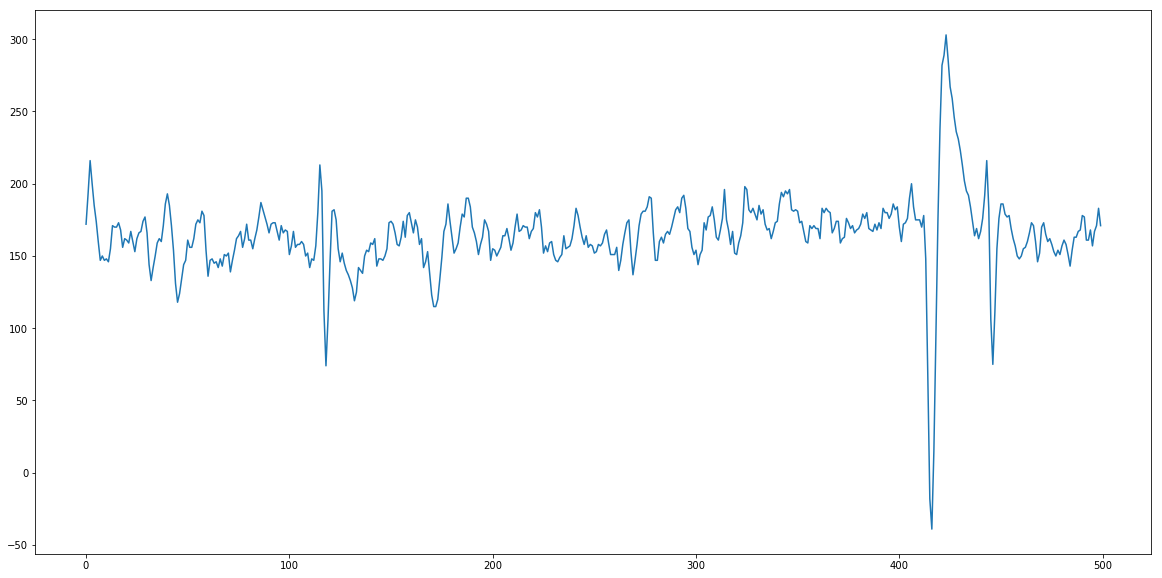

In [10]:
plot_data(data)

## Computing noise spatiotemporal covariance

In [11]:
spatial, temporal = blocks.covariance(data, temporal_size=dims[1], neigbor_steps=1)

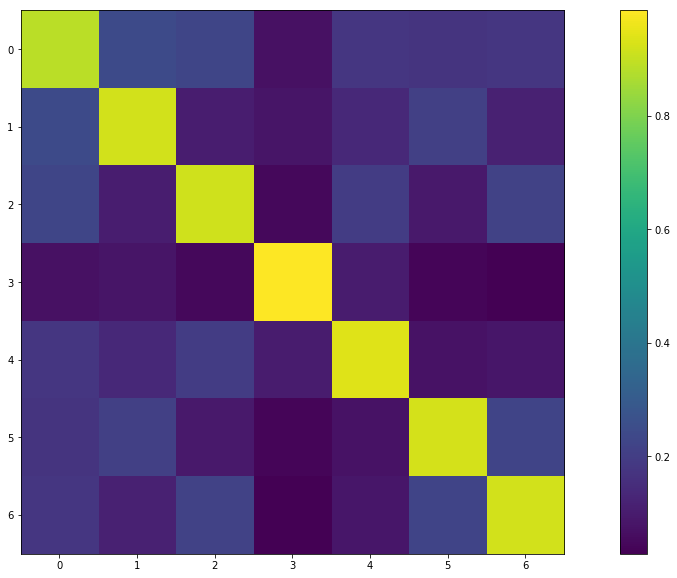

In [12]:
plot_matrix(spatial)

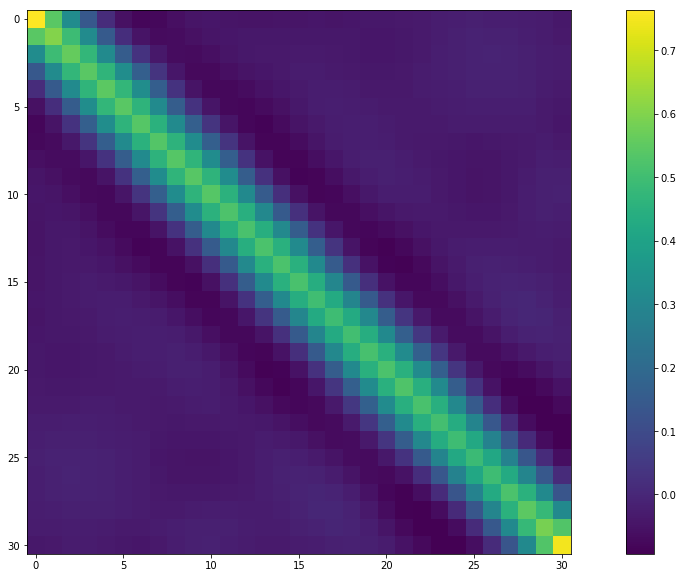

In [13]:
plot_matrix(temporal)

In [14]:
noise = np.random.normal(size=dims)

for c in range(dims[2]):
    noise[:,:,c] = np.matmul(noise[:,:,c], temporal)

reshaped_noise = np.reshape(noise,(-1,noise.shape[2]))

noise = np.reshape(np.matmul(reshaped_noise, spatial), dims) * 1.5

In [15]:
noise[0,:,:].shape

(31, 7)

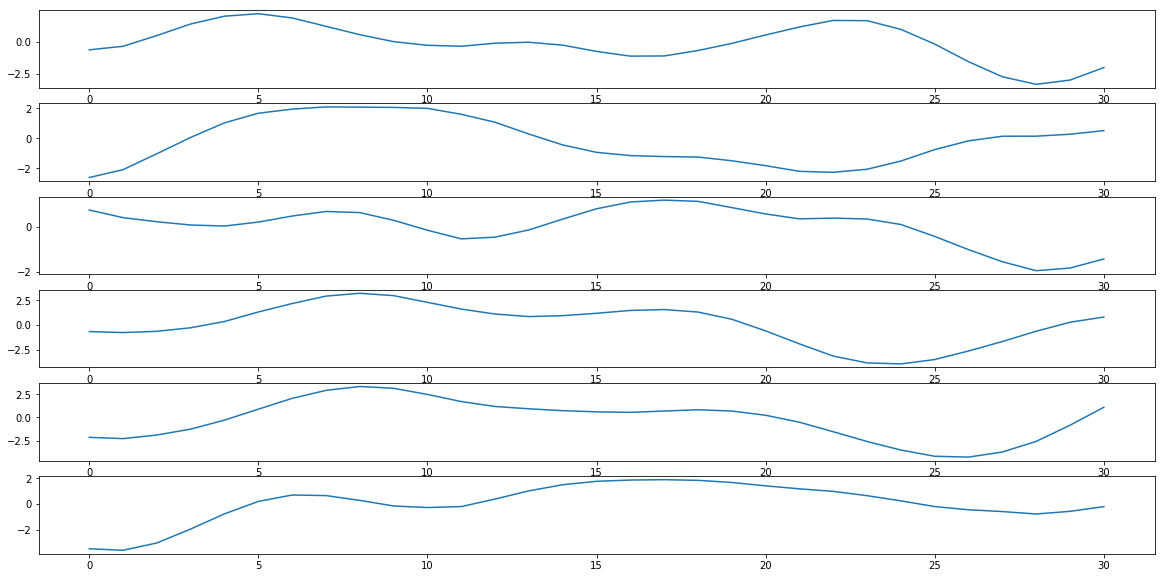

In [16]:
plot.multi_channel_series(noise[10,:,:], range(6))

# Dimensionality reduction

In [17]:
detector = NeuralNetDetector(cfg)

In [18]:
rot = detector.load_w_ae()

INFO:tensorflow:Restoring parameters from /Users/Edu/data/yass/ae_31.ckpt


In [19]:
rot.shape

(31, 3)

In [20]:
noise[10,:,:].shape

(31, 7)

In [21]:
noise_red = np.empty((dims[0], 3, 7))

In [22]:
noise_red.shape

(49998, 3, 7)

In [23]:
for i in range(dims[1]):
    noise_red[i, :, :] = np.matmul(rot.T, noise[i,:,:])

In [24]:
noise_red.shape

(49998, 3, 7)

In [31]:
noise[0,:,:].shape

(31, 7)

In [29]:
detector.get_spikes(noise[0, :, :])

INFO:tensorflow:Restoring parameters from /Users/Edu/data/yass/detectnet1.ckpt
INFO:tensorflow:Restoring parameters from /Users/Edu/data/yass/ae_31.ckpt


ValueError: could not broadcast input array from shape (5,3) into shape (5,2)